### Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

### Preparing data

In [2]:
df = pd.read_csv('datasets/bbc_text_cls.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
df['target'] = df['labels'].astype('category').cat.codes

In [5]:
# Number of classes
K = df['target'].max() + 1
K

5

In [6]:
X = df['text']
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Convert sentence to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [9]:
# Get word to integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'Found {V} unique tokens.')

Found 27527 unique tokens.


In [10]:
# Pad sequence so that we get a N x T matric
X_train = pad_sequences(X_train)
print(f'Shape of train data tensor: {X_train.shape}')

Shape of train data tensor: (1557, 3487)


In [11]:
# Get sequence length
T = X_train.shape[1]

In [12]:
X_test = pad_sequences(X_test, maxlen=T)
print(f'Shape of test data tensor: {X_test.shape}')

Shape of test data tensor: (668, 3487)


### Create a model

In [13]:
# We get to choose embedding dimension
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [14]:
# Exercise: try other models
# 1) multiple LSTM layers
# 2) GRU instead of LSTM
# 3) SimpleRNN instead of LSTM
# 4) return_sequences=False, and no maxpool
# 5) For 1-4, try different values of number of hidden units
# 6) Combinations of the above

# Common beginner question:
# "how can I choose the best combination of hyperparameters?"
# This is how! There is no shortcut!

In [15]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 30,
    batch_size=32
)

Epoch 1/30
49/49 [==============================] - 90s 2s/step - loss: 1.6007 - accuracy: 0.2364 - val_loss: 1.5834 - val_accuracy: 0.2784
Epoch 2/30
49/49 [==============================] - 84s 2s/step - loss: 1.5026 - accuracy: 0.4978 - val_loss: 1.3799 - val_accuracy: 0.5943
Epoch 3/30
49/49 [==============================] - 84s 2s/step - loss: 1.2075 - accuracy: 0.6686 - val_loss: 1.4258 - val_accuracy: 0.4386
Epoch 4/30
49/49 [==============================] - 87s 2s/step - loss: 0.9067 - accuracy: 0.6975 - val_loss: 0.7423 - val_accuracy: 0.7470
Epoch 5/30
49/49 [==============================] - 86s 2s/step - loss: 0.6613 - accuracy: 0.8041 - val_loss: 0.6715 - val_accuracy: 0.7889
Epoch 6/30
49/49 [==============================] - 86s 2s/step - loss: 1.0419 - accuracy: 0.7071 - val_loss: 0.6588 - val_accuracy: 0.8982
Epoch 7/30
49/49 [==============================] - 87s 2s/step - loss: 0.5672 - accuracy: 0.9171 - val_loss: 0.5125 - val_accuracy: 0.9147
Epoch 8/30
49/49 [==

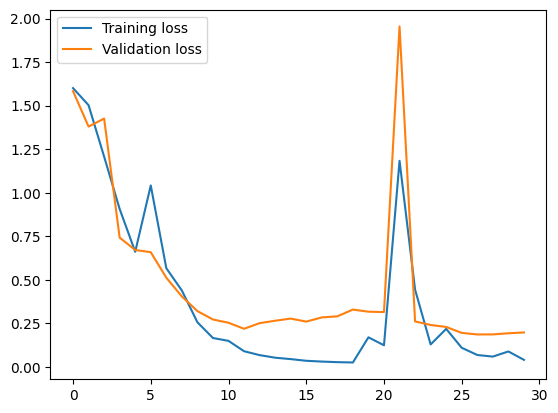

In [16]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend();

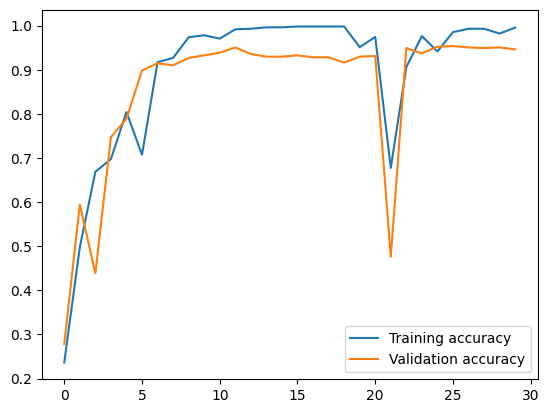

In [17]:
# Plot Accuracy per iteration
plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend();